In [3]:
from PIL import Image
import requests
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import pyocr

In [4]:
def openImg(url):
    pil_img = Image.open(io.BytesIO(requests.get(url).content))
    pil_img = pil_img.convert('RGB')
    np_img = np.array(pil_img)
    return np_img

In [41]:
# img = openImg("https://raw.githubusercontent.com/result-database/ocr-api-v3-notebook/main/IMG_8927.png")
img = openImg("https://raw.githubusercontent.com/result-database/ocr-api-v3-notebook/main/wide1.jpg")

# left:0 top:0 right:1/2 bottom:6/7
img = img[0 : img.shape[0] // 7, 0 : img.shape[1] // 2]

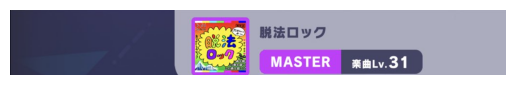

In [42]:
plt.imshow(img)
plt.axis('off')
plt.show()

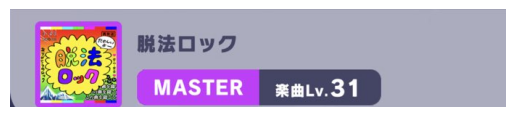

In [43]:
border = 10
img2 = img.copy()

r, g, b = img2[:, :, 0], img2[:, :, 1], img2[:, :, 2]
mask = np.logical_and.reduce((r >= 171 - border, r <= 171 + border, 
                              g >= 172 - border, g <= 172 + border, 
                              b >= 189 - border, b <= 189 + border))
img2[mask] = [255, 255, 255]
img2[np.logical_not(mask)] = [0, 0, 0]

img2 = cv2.medianBlur(img2, 9)

crop_range = Image.fromarray(img2).convert('RGB').getbbox()
img = img[crop_range[1] : (crop_range[3]) // 1, crop_range[0] : crop_range[2]]

plt.imshow(img)
plt.axis('off')
plt.show()

(135, 684, 3)


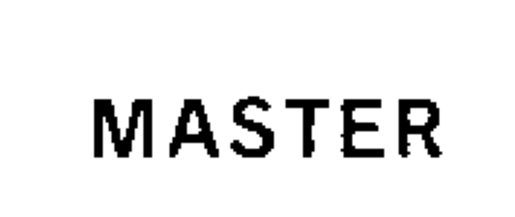

In [44]:
print(img.shape)

img = img[math.floor(img.shape[0] / 2) : img.shape[0], math.floor(img.shape[1] / 4) : math.floor(img.shape[1] / 2)]

border = 225

r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
mask = np.logical_and(r >= border, np.logical_and(g >= border, b >= border))
img[mask] = [0, 0, 0]
img[np.logical_not(mask)] = [255, 255, 255]

plt.imshow(img)
plt.axis('off')
plt.show()

In [45]:
tools = pyocr.get_available_tools()
tool = tools[0]

# generate builder
builder = pyocr.builders.TextBuilder(tesseract_layout=7)
builder.tesseract_configs.append('-c')
builder.tesseract_configs.append('tessedit_char_whitelist="EASYNORMLHDXPTA"')

# do OCR
result = tool.image_to_string(Image.fromarray(img), lang="eng", builder=builder)

# delete white space
result = result.replace(' ', '')
result = result.replace('\n', '')

print(result)

MASTER
